<a href="https://colab.research.google.com/github/mghendi/feedbackclassifier/blob/main/Feedback_and_Question_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CCI508 - Language Technology Project

### Name: Samuel Mwamburi Mghendi 

### Admission Number: P52/37621/2020

### Email: mghendi@students.uonbi.ac.ke

### Course: Language Technology – CCI 508

#### Applying Natural Language Processing (NLP) in the Classification of Bugs, Tasks and Improvements for feedback and questions received by Software Developers.

#### This report is organised as follows.

1. Data Description
   * Data Loading and Preparation
   * Exploratory Data Analysis
2. Data Preprocessing and Modelling
   * Data Preprocessing
   * Modelling
3. Model Evaluation
4. Conclusion

### 1. Data Description
   ####  Data Loading and Preparation
   
   
   
#### Initialization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pymysql

In [ ]:
import os
import datetime

#### Import Data from Database

In [ ]:
database =  pymysql.connect (host="localhost", user = "root", passwd = "password", db = "helpdesk")

In [ ]:
cursor1 = database.cursor()

In [ ]:
cursor1.execute("select * from issues limit 5;")

5

In [ ]:
results = cursor1.fetchall()

In [ ]:
print(results)

((1, 'Task', 'Simon Mogaka', 'Automate importing of Umoja data form Email to Central DB', '28-05-2018'), (2, 'Bug', 'Simon Mogaka', 'There is an error when editing a UID (currency options diasppear) and the donor does not show on the summary list', '19-06-2015'), (3, 'Task', 'Simon Mogaka', 'User Modules', '18-07-2015'), (4, 'Task', 'Simon Mogaka', 'Communication > Pending Approval > UID Letter Approvals', '19-07-2015'), (5, 'Bug', 'Simon Mogaka', 'Error on Editing Function', '19-07-2015'))


In [ ]:
import pandas as pd
df = pd.read_sql_query("select * from issues limit 70;", database)

In [ ]:
df

,id,issue_type,user,summary,created
0,1,Task,Simon Mogaka,Automate importing of Umoja data form Email to...,28-05-2018
1,2,Bug,Simon Mogaka,There is an error when editing a UID (currency...,19-06-2015
2,3,Task,Simon Mogaka,User Modules,18-07-2015
3,4,Task,Simon Mogaka,Communication > Pending Approval > UID Letter ...,19-07-2015
4,5,Bug,Simon Mogaka,Error on Editing Function,19-07-2015
...,...,...,...,...,...
65,66,Task,Paul Maina,"Changes in data, deletions of erroneous records",14-09-2017
66,67,Task,Simon Mogaka,ANUBIS - Unable to upload documents,20-09-2017
67,68,Bug,Simon Mogaka,Error on uploading Minutes,17-10-2017
68,69,Task,Samuel Mwamburi Mghendi,PostgreSQL db dump restoration issue on DSpace...,19-10-2017


In [ ]:
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt

   ####  Exploratory Data Analysis

In [ ]:
df.describe()

,id
count,70.000000
mean,35.500000
std,20.351085
min,1.000000
25%,18.250000
50%,35.500000
75%,52.750000
max,70.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          70 non-null     int64 
 1   issue_type  70 non-null     object
 2   user        70 non-null     object
 3   summary     70 non-null     object
 4   created     70 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


In [ ]:
df['issue_type'].astype(str)

0     Task
1      Bug
2     Task
3     Task
4      Bug
      ... 
65    Task
66    Task
67     Bug
68    Task
69    Task
Name: issue_type, Length: 70, dtype: object

In [ ]:
del df['id']
del df['created']
del df['user']

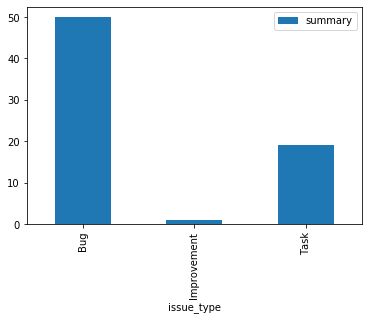

In [ ]:
df.groupby(['issue_type']).count().plot.bar(ylim=0)
plt.show()

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Remove StopWords from issues

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mghendis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sw = stopwords.words('english')

In [ ]:
def stopwords(summary):
    summary = [word.lower() for word in summary.split() if word.lower() not in sw]
    return " ".join(summary)

In [ ]:
df['summary'] = df['summary'].apply(stopwords)
df

,issue_type,summary
0,Task,automate importing umoja data form email centr...
1,Bug,error editing uid (currency options diasppear)...
2,Task,user modules
3,Task,communication > pending approval > uid letter ...
4,Bug,error editing function
...,...,...
65,Task,"changes data, deletions erroneous records"
66,Task,anubis - unable upload documents
67,Bug,error uploading minutes
68,Task,postgresql db dump restoration issue dspace 6.2


#### Replacing non-ASCII characters with spaces

In [ ]:
from unidecode import unidecode

def remove_non_ascii(summary):

    return ''.join([i if ord(i) < 128 else ' ' for i in summary])

In [ ]:
df['summary'] = df['summary'].apply(remove_non_ascii)
df

,issue_type,summary
0,Task,automate importing umoja data form email centr...
1,Bug,error editing uid (currency options diasppear)...
2,Task,user modules
3,Task,communication > pending approval > uid letter ...
4,Bug,error editing function
...,...,...
65,Task,"changes data, deletions erroneous records"
66,Task,anubis - unable upload documents
67,Bug,error uploading minutes
68,Task,postgresql db dump restoration issue dspace 6.2


#### Removing HTML tags from issues

In [ ]:
def remove_html_tags(summary):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', summary)

In [ ]:
df['summary'] = df['summary'].apply(remove_html_tags)
df

,issue_type,summary
0,Task,automate importing umoja data form email centr...
1,Bug,error editing uid (currency options diasppear)...
2,Task,user modules
3,Task,communication > pending approval > uid letter ...
4,Bug,error editing function
...,...,...
65,Task,"changes data, deletions erroneous records"
66,Task,anubis - unable upload documents
67,Bug,error uploading minutes
68,Task,postgresql db dump restoration issue dspace 6.2


#### Removing punctuations from issues

In [ ]:
def remove_punctuation(summary):
    import string
    for c in string.punctuation:
        summary = summary.replace(c," ")
    return summary

In [ ]:
df['summary'] = df['summary'].apply(remove_punctuation)
df

,issue_type,summary
0,Task,automate importing umoja data form email centr...
1,Bug,error editing uid currency options diasppear ...
2,Task,user modules
3,Task,communication pending approval uid letter ...
4,Bug,error editing function
...,...,...
65,Task,changes data deletions erroneous records
66,Task,anubis unable upload documents
67,Bug,error uploading minutes
68,Task,postgresql db dump restoration issue dspace 6 2


#### Lowercase all issues

In [ ]:
def lowercase(summary):
    import string
    for c in string:
        summary = summary.lower(c)
    return summary

#### Removing emoticons from issues

In [ ]:
def remove_emoticons(summary):
    import re
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',summary)

In [ ]:
df['summary'] = df['summary'].apply(remove_emoticons)
df

,issue_type,summary
0,Task,automate importing umoja data form email centr...
1,Bug,error editing uid currency options diasppear ...
2,Task,user modules
3,Task,communication pending approval uid letter ...
4,Bug,error editing function
...,...,...
65,Task,changes data deletions erroneous records
66,Task,anubis unable upload documents
67,Bug,error uploading minutes
68,Task,postgresql db dump restoration issue dspace 6 2


### 2. Data Preprocessing and Modelling



#### Converting Text to Numerical Vector

In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
df["issue_type"].replace({"Bug": "0", "Task": "1", "Improvement": "2"}, inplace=True)
print(df)

   issue_type                                            summary
0           1  automate importing umoja data form email centr...
1           0  error editing uid  currency options diasppear ...
2           1                                       user modules
3           1  communication   pending approval   uid letter ...
4           0                             error editing function
..        ...                                                ...
65          1          changes data  deletions erroneous records
66          1                   anubis   unable upload documents
67          0                            error uploading minutes
68          1    postgresql db dump restoration issue dspace 6 2
69          1                      new dspace 6 x mirage 2 theme

[70 rows x 2 columns]


In [ ]:
df["issue_type"].value_counts(normalize= True)

0    0.714286
1    0.271429
2    0.014286
Name: issue_type, dtype: float64

#### Vectorize sentences

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(df["summary"])
vectorizer.vocabulary_

{'automate': 25,
 'importing': 100,
 'umoja': 195,
 'data': 51,
 'form': 83,
 'email': 73,
 'central': 32,
 'db': 52,
 'error': 78,
 'editing': 71,
 'uid': 194,
 'currency': 50,
 'options': 140,
 'diasppear': 59,
 'donor': 65,
 'show': 175,
 'summary': 182,
 'list': 117,
 'user': 203,
 'modules': 133,
 'communication': 42,
 'pending': 150,
 'approval': 22,
 'letter': 113,
 'approvals': 23,
 'function': 86,
 'revealed': 165,
 'backend': 26,
 'code': 38,
 'saving': 168,
 'new': 136,
 'details': 58,
 'throwing': 189,
 'message': 129,
 'one': 139,
 'tries': 191,
 'uploading': 202,
 'wrong': 211,
 'document': 62,
 'format': 84,
 'cop': 45,
 'mop': 134,
 'funds': 89,
 'pledges': 151,
 'messages': 130,
 'throughtout': 188,
 'application': 21,
 'sql': 179,
 'validation': 204,
 'cover': 48,
 'letters': 114,
 'invoices': 104,
 'generated': 90,
 'saves': 167,
 'empty': 74,
 'allotment': 13,
 'funding': 88,
 'delete': 53,
 'deleting': 54,
 'record': 158,
 'without': 208,
 'selecting': 170,
 'check

#### Creating a Bag of Words model

In [ ]:
vectorizer.transform(df["summary"]).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Split the data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
summaries = df["summary"].values
y = df["issue_type"].values

In [ ]:
summaries_train, summaries_test, y_train, y_test = train_test_split(summaries, y, test_size=0.25, random_state=1000)

#### Using the BOW model to vectorize the questions

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(summaries_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(summaries_train)
X_test  = vectorizer.transform(summaries_test)
X_train

<52x172 sparse matrix of type '<class 'numpy.int64'>'
	with 254 stored elements in Compressed Sparse Row format>

#### The resulting feature vectors have 52 samples which are the number of training samples after the train-test split. Each sample has 172 dimensions which is the size of the vocabulary.

### 3. Model Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

In [ ]:
print("Accuracy:", score)

Accuracy: 0.6666666666666666


### 4. Conclusion

#### Logistic regression classifies the data by considering outcome variables on extreme ends and consequently forms a line to distinguish them.
#### This algorithm provides great efficiency, works well in the segmentation and categorization of a small number of categorical variables.
